# Project Name

## Goal:
- Objective 1
- Objective 2

# Imports

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import acquire as a
import wrangle as w
import keila_explore as ke
import explore as e
# import model as m
# import evaluate as ev

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import unicodedata
import nltk
from wordcloud import WordCloud
import os
import json

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr, f_oneway, ttest_ind

np.random.seed(123)

# Acquire
- Data acquired from _____ (e.g. [data.world](https://data.world/food/wine_quality) )
- It contained xx rows and xx columns before cleaning
- Each row represents ____
- Each column represents ____

# Prepare
- Removed ...
- Renamed ...
- Checked for nulls ...
- Checked that column data types were appropriate ...
- Outliers ?
- Added target column?
- Added additional features?
- Encoded categorical variables
- Split data into train, validate, and test (60/20/20), stratifying ...
- Scaled continuous variables


# Data Dictionary

| Feature | Type | Definition |
|:--------|:-----|:-----------|
|feature_1 (target)|integer|definition 1|

In [13]:
## acquireing and preparing data for exploration
df = a.get_data_json()

df = w.clean_df(df)




In [14]:
## splitting data in to train, validate, and test
train, validate, test = w.split_data(df)

# A brief look at the data

In [15]:
train.head()

,repo,language,readme_contents,lemmatized,readme_length
70,inkling/Subliminal,Objective-C,"<p align=""center"" >\n <img src=""http://inklin...",p aligncenter img srchttpinklinggithubiosublim...,11215
59,microsoftarchive/android-sliding-layer-lib,Java,6Wunderkinder SlidingLayer for Android\n======...,6wunderkinder slidinglayer android repository ...,4266
92,jamesob/tinychain,Python,"# ⛼ tinychain\n\n*Putting the rough in ""[roug...",tinychain putting rough rough consensushttpsto...,8333
104,Cleveroad/CRNetworkButton,Swift,# CRNetworkButton [![Awesome](https://cdn.rawg...,crnetworkbutton awesomehttpscdnrawgitcomsindre...,5268
97,zhangxinxu/mobilebone,JavaScript,"mobilebone.js\n=============\n\n<img src=""http...",mobilebonejs img srchttpswwwzhangxinxucomgithu...,5908


## A summary of the data

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 70 to 75
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             66 non-null     object
 1   language         66 non-null     object
 2   readme_contents  66 non-null     object
 3   lemmatized       66 non-null     object
 4   readme_length    66 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 3.1+ KB


In [17]:
train.describe()

,readme_length
count,66.000000
mean,9124.742424
std,25242.379029
min,251.000000
25%,2835.000000
50%,4877.500000
75%,6918.250000
max,206311.000000


# Explore

In [18]:
# split the words individually up and lemmatize them                                                                                                                                                                                                                                                                                                            
git_lem_words =" ".join(train.lemmatized).split(" ")

lem_freq = pd.Series(git_lem_words).value_counts()

# create df of freq words
word_counts = pd.concat([lem_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ["lemmatize"]
word_counts

,lemmatize
rust,451
build,277
use,215
library,204
file,147
...,...
era,1
mitlicense,1
sendinputforcelogout,1
stateloggingin,1


## Question 2 Are there any words that uniquely identify a programming language?
- NOTE: this question is more of a look at the data, not a stats test question

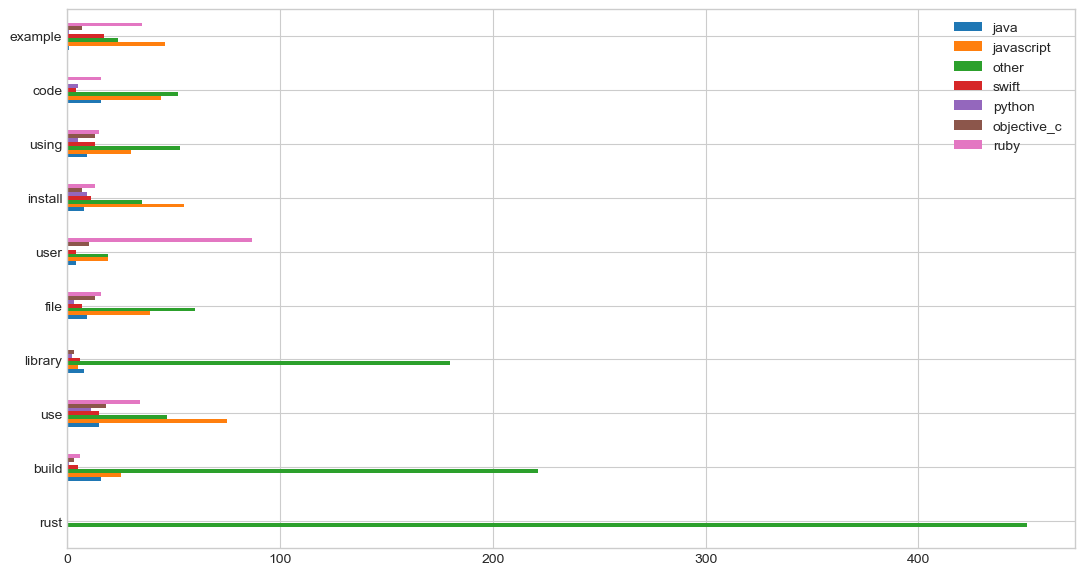

In [22]:
e.get_word_viz(train)

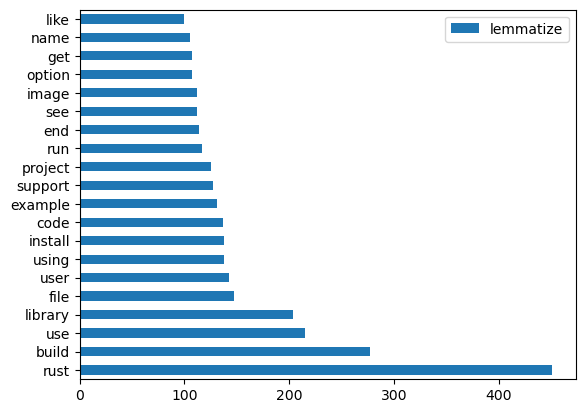

In [19]:
# Example: # get a boxplot and histplot of property_value of train
# Visualize Example: # get a regplot of squarefeet vs property_value on train
word_counts.sort_values("lemmatize", ascending=False)[["lemmatize"]].head(20).plot.barh();



* `rust` library for C
* `ruby` ruby is a language

## Question 1 Are there bigrams or n-grams that can uniquely identify a programming language?

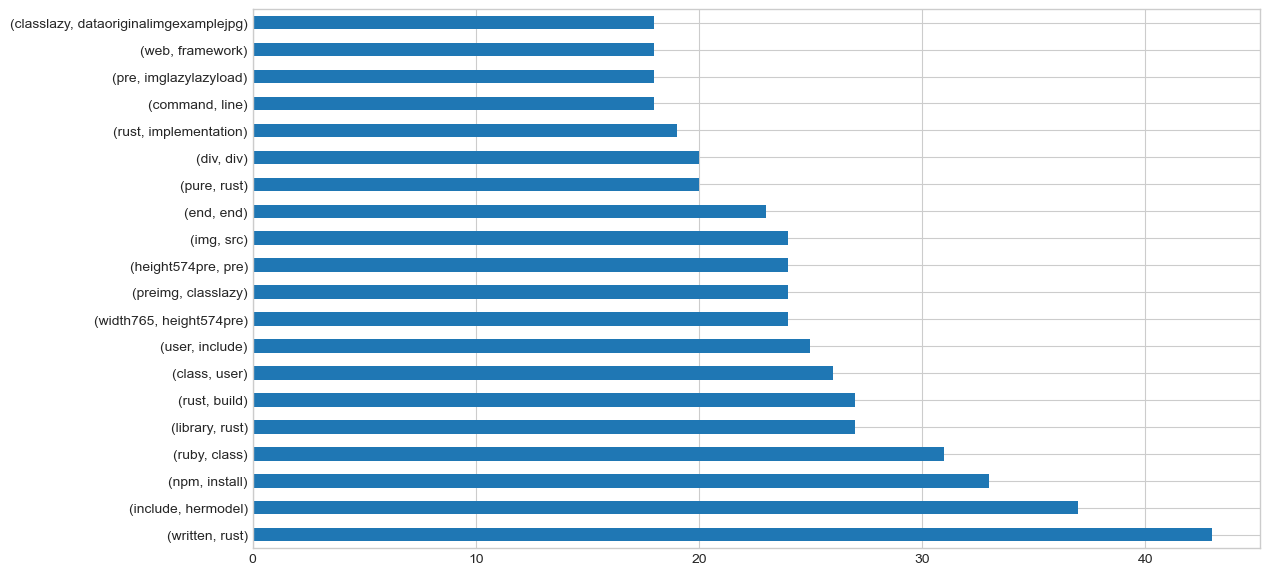

In [23]:
# Visualize Example: # get a regplot of squarefeet vs property_value on train
e.make_ngram(git_lem_words, 2).head(20).plot.barh();

### Summarize
* `pure, rust`, `rust, build` rust is a library for C language, which leads me to objective-c
* `install npm` npm is a package manager for the JavaScript programming language
* `library ruby` ruby is a language 

In [25]:
# split the words individually up and lemmatize them                                                                                                                                                                                                                                                                                                            
git_lem_words =" ".join(train.lemmatized).split(" ")

lem_freq = pd.Series(git_lem_words).value_counts()

# create df of freq words
word_counts = pd.concat([lem_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ["lemmatize"]

# create df of most common words
word_counts.head(10)


,lemmatize
rust,451
build,277
use,215
library,204
file,147
user,143
using,138
install,138
code,137
example,131


In [26]:
#import
from sklearn.feature_extraction.text import TfidfVectorizer
#make it
tfidf = TfidfVectorizer()

#fit it/use it
bag_of_words = tfidf.fit_transform(git_lem_words)

In [113]:
gram_words = e.make_ngram(git_lem_words, 2)

In [114]:
gram_words = pd.DataFrame(gram_words).reset_index()

In [115]:
gram_words.columns

Index(['index', 0], dtype='object')

In [116]:
gram_words = gram_words.rename(columns={"index": "bigram", 0: "count"})

In [117]:
# turns tuples into strings
def convertTuple(tup):
        # initialize an empty string
    str = ''
    for item in tup:
        str = str + item
    return str

In [123]:
# create list of strings from tuple and append to list that will be added to df column
lst = []
for gram in gram_words.bigram:
    temp = convertTuple(gram)
    lst.append(temp)

In [ ]:
gram_words["non_tup"] = lst

In [133]:
gram_words[gram_words.non_tup == "statusbar"]

,bigram,count,non_tup
32,"(status, bar)",13,statusbar


In [32]:
def get_language_word_variables(df):
    language_categories = {
        'Java': 'java_words',
        'JavaScript': 'javascript_words',
        'other': 'other_words',
        'Swift': 'swift_words',
        'Python': 'python_words',
        'Objective-C': 'objectivec_words',
        'Ruby': 'ruby_words'
    }

    language_word_variables = {}

    for language, variable_name in language_categories.items():
        words = ' '.join(df[df.language == language].lemmatized).split()
        language_word_variables[variable_name] = words

    return language_word_variables



In [33]:
lang_dict = get_language_word_variables(train)
for lang in lang_dict:
    print(lang)
    



java_words
javascript_words
other_words
swift_words
python_words
objectivec_words
ruby_words


In [34]:
lang_dict = get_language_word_variables(train)
for lang in lang_dict:
    
    print(ke.make_ngram(lang_dict[lang], 2).head(1))

(plugged, app)    9
dtype: int64
(npm, install)    29
dtype: int64
(written, rust)    43
dtype: int64
(structured, concurrency)    7
dtype: int64
(info, address)    5
dtype: int64
(status, bar)    12
dtype: int64
(include, hermodel)    37
dtype: int64


In [130]:
train.shape

(66, 5)

In [131]:
9+29+43+7+5+12+37


142

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

data = {
    ('plugged', 'app'): 9, 
    ('npm', 'install'): 29,
    ('written', 'rust'): 43,
    ('structured', 'concurrency'): 7,
    ('info', 'address'): 5,
    ('status', 'bar'): 12,`
    ('include', 'hermodel'): 37
}

# Extract the labels and counts from the data dictionary
labels = [f"{word1}, {word2}" for (word1, word2) in data.keys()]
counts = list(data.values())

# Define colors for each bar graph
colors = ['#FFC0CB', '#FFA07A', '#FFA500', '#FFD700', '#ADFF2F', 'cyan', '#E6E6FA']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts)

# Set different colors for each bar
for i, bar in enumerate(bars):
    bar.set_color(colors[i])

plt.xlabel('Word Pair')
plt.ylabel('Count')
plt.title('Bigram Frequency')

# Create a legend for the colors
legend_labels = ['Java', 'JavaScript', 'Other', 'Swift', 'Python', 'Objective-C', 'Ruby']
legend_colors = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_colors, legend_labels)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


In [ ]:
# join words from all language categories together into one string, then split into list of words
java_words = ' '.join(df[df.language == 'Java'].lemmatized).split()
javascript_words = ' '.join(df[df.language == 'JavaScript'].lemmatized).split()
other_words = ' '.join(df[df.language == 'other'].lemmatized).split()
swift_words = ' '.join(df[df.language == 'Swift'].lemmatized).split()
python_words = ' '.join(df[df.language == 'Python'].lemmatized).split()
objectivec_words = ' '.join(df[df.language == 'Objective-C'].lemmatized).split()
ruby_words = ' '.join(df[df.language == 'Ruby'].lemmatized).split()
all_words = ' '.join(df.lemmatized).split()

# get a series of value counts for each of language categories plus all words
java_freq = pd.Series(java_words).value_counts()
javascript_freq = pd.Series(javascript_words).value_counts()
other_freq = pd.Series(other_words).value_counts()
swift_freq = pd.Series(swift_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
objectivec_freq = pd.Series(objectivec_words).value_counts()
ruby_freq = pd.Series(ruby_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [ ]:
# combine freq series into a dataframe called word_counts
word_counts = pd.concat([all_freq, java_freq, javascript_freq, other_freq
                        , swift_freq, python_freq, objectivec_freq, ruby_freq], axis = 1, sort=True)
# fill na with 0
word_counts = word_counts.fillna(0)
# make values integers instead of floats
word_counts = word_counts.apply(lambda s: s.astype(int))
# rename the columns
word_counts.columns = ['all', 'java', 'javascript', 'other', 'swift', 'python', 'objective_c', 'ruby']
word_counts

In [ ]:
languages = word_counts.columns[1:]
languages

# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')

# visualization of top 20 words and ham vs spam
word_counts.sort_values('all', ascending=False)[languages].head(10).plot.barh()
plt.show()

## Question 2 (e.g. Is feature_x associated with target?)

In [ ]:
# Visualize Example: # get a regplot of squarefeet vs property_value on train
## INSERT CODE HERE

### Analyze feature_x vs target with stats
- $H_0$: There is NO relationship between feature_x and target
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Example 1: Utilize pearsonr - we are comparing continuous variables, normally distributed
    - Example 2:Comparing a categorical to a continuous variable, normally distributed, and equal variance
        - Testing if property value of has_pool == 1 is signicantly greater than has_pool == 0:  one-tail ttest
        - Utilize f_oneway
    - Many other stats tests

In [ ]:
# get the stats from a pearsonr test on feature_x vs target
## INSERT CODE HERE

### Summarize
- p is < $\alpha$, so we can reject the $H_0$ which suggest the $H_a$, i.e. there IS a relationship between feature_x and target (and maybe more description)

## Question 3 (e.g. Is feature_x associated with target?)

In [ ]:
# Visualize Example: # get a regplot of squarefeet vs property_value on train
## INSERT CODE HERE

### Analyze feature_x vs target with stats
- $H_0$: There is NO relationship between feature_x and target
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Example 1: Utilize pearsonr - we are comparing continuous variables, normally distributed
    - Example 2:Comparing a categorical to a continuous variable, normally distributed, and equal variance
        - Testing if property value of has_pool == 1 is signicantly greater than has_pool == 0:  one-tail ttest
        - Utilize f_oneway
    - Many other stats tests

In [ ]:
# get the stats from a pearsonr test on feature_x vs target
## INSERT CODE HERE

### Summarize
- p is < $\alpha$, so we can reject the $H_0$ which suggest the $H_a$, i.e. there IS a relationship between feature_x and target (and maybe more description)

## Question 4 (e.g. Is feature_x associated with target?)

In [ ]:
# Visualize Example: # get a regplot of squarefeet vs property_value on train
# INSERT CODE HERE

### Analyze feature_x vs target with stats
- $H_0$: There is NO relationship between feature_x and target
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Example 1: Utilize pearsonr - we are comparing continuous variables, normally distributed
    - Example 2:Comparing a categorical to a continuous variable, normally distributed, and equal variance
        - Testing if property value of has_pool == 1 is signicantly greater than has_pool == 0:  one-tail ttest
        - Utilize f_oneway
    - Many other stats tests

In [ ]:
# get the stats from a pearsonr test on feature_x vs target
## INSERT CODE HERE

### Summarize
- p is < $\alpha$, so we can reject the $H_0$ which suggest the $H_a$, i.e. there IS a relationship between feature_x and target (and maybe more description)

## Exploration Summary
* Plain English bullets as required

* Features that have a relationship with target (stats test for feature_y, feature_z, etc. completed on separate working notebook:
    * feature x ...
    * feature y
    * feature z


### (As Required) Features I am moving to modeling with

### (As Required) Features I am not moving to modeling with

# Modeling
* Evaluation Metrics (example: I will use R^2 and Root Mean Square Error (RMSE) as my evaluation metrics)
    * for R^2, the value is in the range 0-1; closer to 1.0 is better; baseline is 0.0
    * for RMSE, the lower the value the better; baseline is xxx
* The average target is xxx which is the baseline prediction
* I will evaluate x different model types and various hyperparameter configurations
    * (Example: The four model types are Ordinary Least Squares (OLS), LassoLars, Polynomial Regression, Generalized Linear Model (GLM))
* Models will be evaluated on train and validate data
* The model that performs the best will then be evaluated on test

In [ ]:
# import for model 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
df.shape

In [ ]:
train.language.value_counts()

In [ ]:
## prep data for modeling
# get X y splits for modeling
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = ke.split_data_xy(train, validate, test)

# create baseline 
baseline_accuracy = (train.language == "JavaScript").mean()
round(baseline_accuracy, 2)

In [ ]:
# create bag of words
cv = CountVectorizer()
x_bow = cv.fit_transform(x_train)
x_validate_bow = cv.transform(x_validate)
x_test_bow = cv.transform(x_test)

## Model Name: DecisionTreeClassifier

In [ ]:
#build my model
tree = DecisionTreeClassifier(max_depth=7, random_state=123)
tree.fit(x_bow, y_train)
tree.score(x_bow, y_train)

# get model results
print(f" Train Score: {tree.score(x_bow, y_train)}, Validation Score: {tree.score(x_validate_bow, y_validate)}")

* model: DecisionTreeClassifier did beat baseline with approximately 27%

## Model: Random Forest

In [ ]:
# get model results
#build my model
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=1, random_state=123)
rf.fit(x_bow, y_train)

# get model results
print(f" Train Score: {rf.score(x_bow, y_train)}, Validation Score: {rf.score(x_validate_bow, y_validate)}")

* model: Random Forest did beat baseline with approximately 8%

## Model: KNN

In [ ]:
# get model results
#build my model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_bow, y_train)

# get model results
print(f" Train Score: {knn.score(x_bow, y_train)}, Validation Score: {knn.score(x_validate_bow, y_validate)}")

* model: KNN did beat baseline with approximately 13%

## Model: LogisticRegression

In [ ]:
# get model results
logit = LogisticRegression(random_state=123)
logit.fit(x_bow, y_train)

# get model results
print(f" Train Score: {logit.score(x_bow, y_train)}, Validation Score: {logit.score(x_validate_bow, y_validate)}")

* model: LogisticRegression did beat baseline with approximately 18%

## Comparing Models
* summarize the model performance
* DecisionTreeClassifier did beat baseline with approximately 27%
* Random Forest did beat baseline with approximately 8%
* KNN did beat baseline with approximately 13%
* I have chosen to move forward with the DecisionTree model on test

## Best Model (model name) on Test

In [ ]:
# get test results for final model
tree.score(x_test_bow, y_test)

## Modeling Summary
* The model outperformed the baseline by 40%

# Conclusions

## Exploration
* bullets

## Modeling
* bullets

## Recommendations
* bullets

## Next steps
* bullets